# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API keywhic
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_data_json = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city = city_data_json["name"]
        city_lat = city_data_json["coord"]["lat"]
        city_lng = city_data_json["coord"]["lon"]
        city_max_temp = city_data_json["main"]["temp_max"]
        city_humidity = city_data_json["main"]["humidity"]
        city_clouds = city_data_json["clouds"]["all"]
        city_wind = city_data_json["wind"]["speed"]
        city_country = city_data_json["sys"]["country"]
        city_date = city_data_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp (K)": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | vila velha
Processing Record 4 of Set 1 | quellon
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | poronaysk
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | constantia
Processing Record 15 of Set 1 | mae chai
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | kununurra
Processing Record 18 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 19 of Set 1 | nar'yan-mar
Processing Record 20 of Set 1 | djibo
Processing Record 21 of Set 1 | tibati
Processing Record 22 of Set 1 | 

Processing Record 40 of Set 4 | pemba
Processing Record 41 of Set 4 | erenhot
Processing Record 42 of Set 4 | karratha
Processing Record 43 of Set 4 | bandarbeyla
Processing Record 44 of Set 4 | tsengel
Processing Record 45 of Set 4 | banda aceh
Processing Record 46 of Set 4 | wau
Processing Record 47 of Set 4 | lhasa
Processing Record 48 of Set 4 | emerald
Processing Record 49 of Set 4 | dehloran
Processing Record 0 of Set 5 | lihue
Processing Record 1 of Set 5 | al bawiti
Processing Record 2 of Set 5 | borgarnes
Processing Record 3 of Set 5 | chalus
Processing Record 4 of Set 5 | massenya
Processing Record 5 of Set 5 | shingu
Processing Record 6 of Set 5 | chui
Processing Record 7 of Set 5 | tinajo
Processing Record 8 of Set 5 | tshabong
Processing Record 9 of Set 5 | piti village
Processing Record 10 of Set 5 | sarina
Processing Record 11 of Set 5 | novodvinsk
Processing Record 12 of Set 5 | petropavlovsk-kamchatsky
Processing Record 13 of Set 5 | nova sintra
Processing Record 14 of

Processing Record 30 of Set 8 | pirallahi
Processing Record 31 of Set 8 | marka
Processing Record 32 of Set 8 | santana
Processing Record 33 of Set 8 | hoxtolgay
City not found. Skipping...
Processing Record 34 of Set 8 | rundu
Processing Record 35 of Set 8 | valparaiso
Processing Record 36 of Set 8 | lobujya
Processing Record 37 of Set 8 | carnarvon
Processing Record 38 of Set 8 | tahe
Processing Record 39 of Set 8 | cape canaveral
Processing Record 40 of Set 8 | laksham
Processing Record 41 of Set 8 | florence
Processing Record 42 of Set 8 | kalmunai
Processing Record 43 of Set 8 | qaqortoq
Processing Record 44 of Set 8 | hauterive
Processing Record 45 of Set 8 | taylors
Processing Record 46 of Set 8 | salinopolis
Processing Record 47 of Set 8 | kayankulam
Processing Record 48 of Set 8 | toliara
Processing Record 49 of Set 8 | ust'-barguzin
Processing Record 0 of Set 9 | kingaroy
Processing Record 1 of Set 9 | tura
Processing Record 2 of Set 9 | tongliao
Processing Record 3 of Set 9 

Processing Record 18 of Set 12 | ordos
City not found. Skipping...
Processing Record 19 of Set 12 | san sebastian de la gomera
Processing Record 20 of Set 12 | inhambane
Processing Record 21 of Set 12 | wauchope
Processing Record 22 of Set 12 | pemangkat
Processing Record 23 of Set 12 | alamosa
Processing Record 24 of Set 12 | liberal
Processing Record 25 of Set 12 | kolonia
Processing Record 26 of Set 12 | revda
Processing Record 27 of Set 12 | gao
Processing Record 28 of Set 12 | tampakan
Processing Record 29 of Set 12 | kavalerovo
Processing Record 30 of Set 12 | ta`u
Processing Record 31 of Set 12 | fortuna
Processing Record 32 of Set 12 | kavieng
Processing Record 33 of Set 12 | shahr-e babak
Processing Record 34 of Set 12 | jabat
Processing Record 35 of Set 12 | margate
Processing Record 36 of Set 12 | moa
Processing Record 37 of Set 12 | urangan
-----------------------------
Data Retrieval Complete      
-----------------------------


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City            561
Lat             561
Lng             561
Max Temp (K)    561
Humidity        561
Cloudiness      561
Wind Speed      561
Country         561
Date            561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (K),Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,291.40,96,76,1.21,ZA,1706672733
1,College,64.8569,-147.8028,246.14,61,75,1.54,US,1706672734
2,Vila Velha,-20.3297,-40.2925,300.12,94,0,3.60,BR,1706672734
3,Quellón,-43.1167,-73.6167,287.33,93,96,2.39,CL,1706672605
4,Bilibino,68.0546,166.4372,239.43,99,100,0.16,RU,1706672735


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

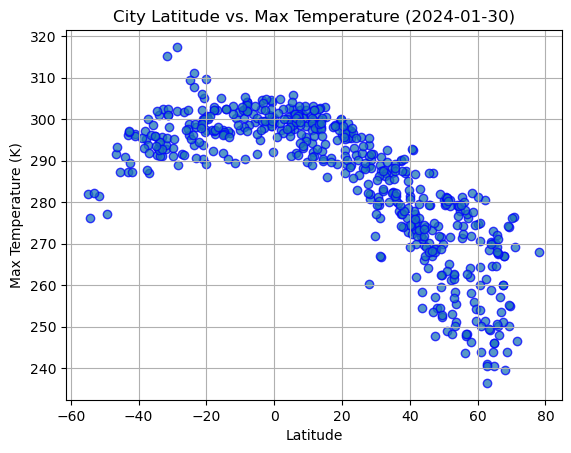

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp (K)'], marker='o', edgecolors='blue', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2024-01-30)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

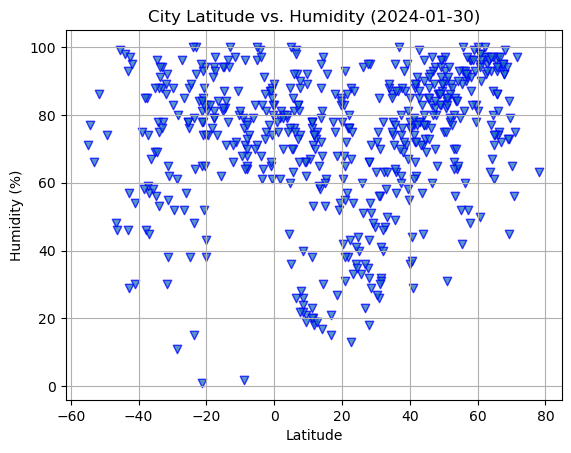

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='v', edgecolors='blue', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-01-30)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

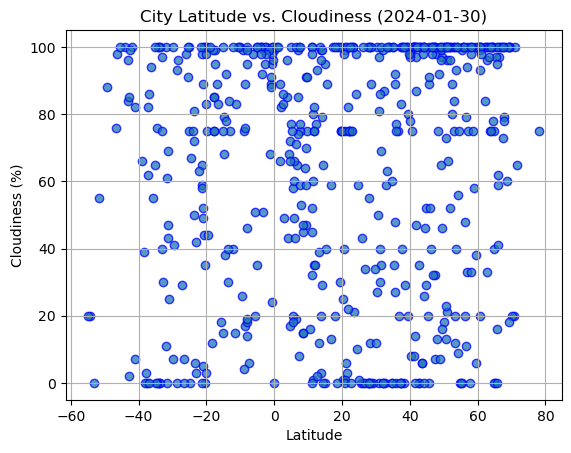

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='blue', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-01-30)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

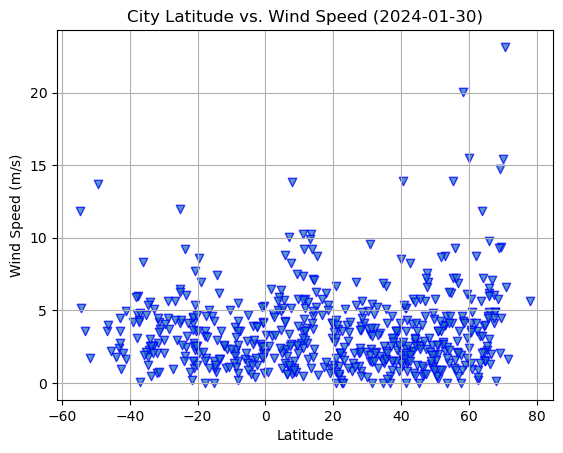

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='v', edgecolors='blue', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-01-30)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    plt.title(f"{title} Linear Regression ({hemisphere} Hemisphere)")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame([data for data in city_data if data['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (K),Humidity,Cloudiness,Wind Speed,Country,Date
0,College,64.8569,-147.8028,246.14,61,75,1.54,US,1706672734
1,Bilibino,68.0546,166.4372,239.43,99,100,0.16,RU,1706672735
2,Udachny,66.4167,112.4000,247.84,75,97,1.31,RU,1706672737
3,Kavaratti,10.5669,72.6420,300.77,67,16,2.76,IN,1706672735
4,Poronaysk,49.2167,143.1167,259.46,83,65,1.11,RU,1706672738


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame([data for data in city_data if data['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (K),Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,291.40,96,76,1.21,ZA,1706672733
1,Vila Velha,-20.3297,-40.2925,300.12,94,0,3.60,BR,1706672734
2,Quellón,-43.1167,-73.6167,287.33,93,96,2.39,CL,1706672605
3,Margaret River,-33.9500,115.0667,300.97,53,0,5.57,AU,1706672736
4,Port-aux-Français,-49.3500,70.2167,277.17,74,88,13.70,TF,1706672686


###  Temperature vs. Latitude Linear Regression Plot

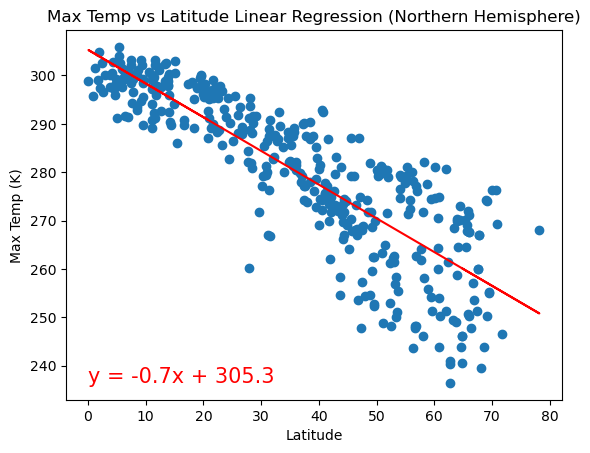

In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp (K)"], "Max Temp vs Latitude", "Latitude", "Max Temp (K)", "Northern")

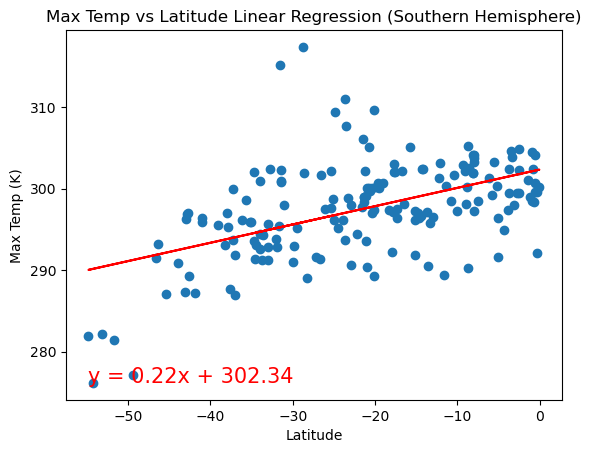

In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp (K)"], "Max Temp vs Latitude", "Latitude", "Max Temp (K)", "Southern")

**Discussion about the linear relationship:** In the Northern Hemisphere there seems to be a relation where the closer we get to the equiator the temperature rises, where further away from the equator the temperature varies more. The southern hemisphere has more variance and outliers.

### Humidity vs. Latitude Linear Regression Plot

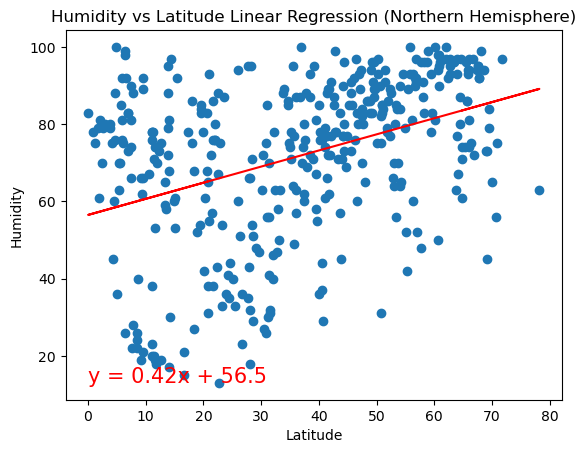

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity vs Latitude", "Latitude", "Humidity", "Northern")

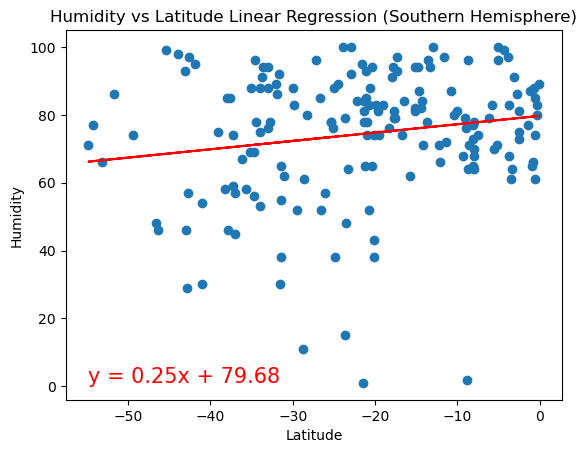

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity vs Latitude", "Latitude", "Humidity", "Southern")

**Discussion about the linear relationship:** There does not seem to be much correlation between the equator and humidity, in the Northern or Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

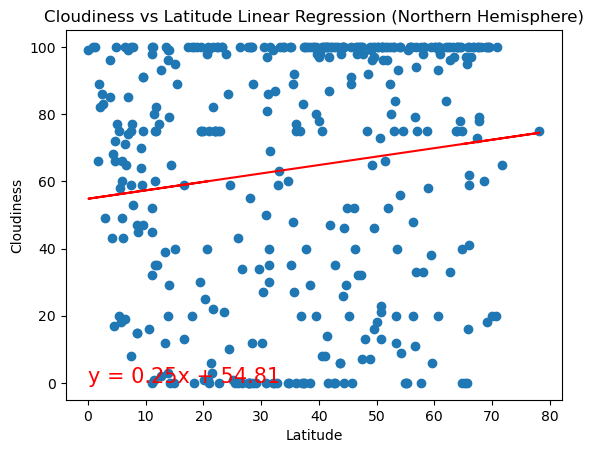

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness vs Latitude", "Latitude", "Cloudiness", "Northern")

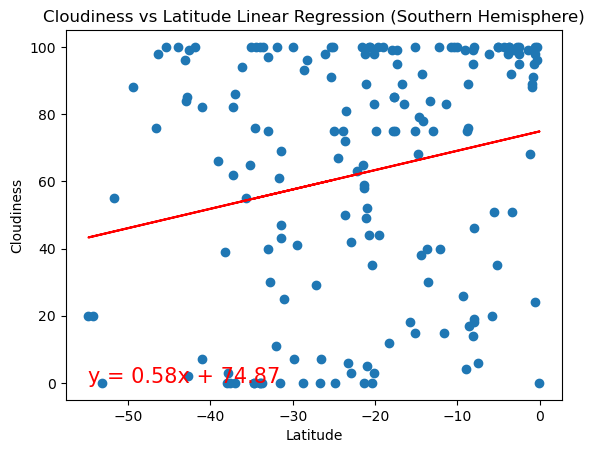

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness vs Latitude", "Latitude", "Cloudiness", "Southern")

**Discussion about the linear relationship:** There does not seem to be much correlation between the equator and cloudiness, in the Northern or Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

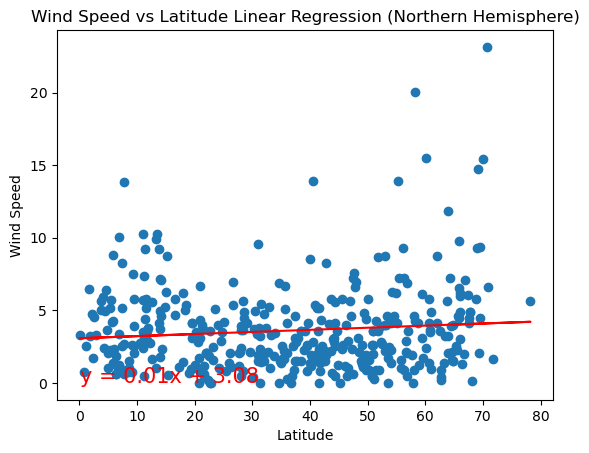

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed vs Latitude", "Latitude", "Wind Speed", "Northern")

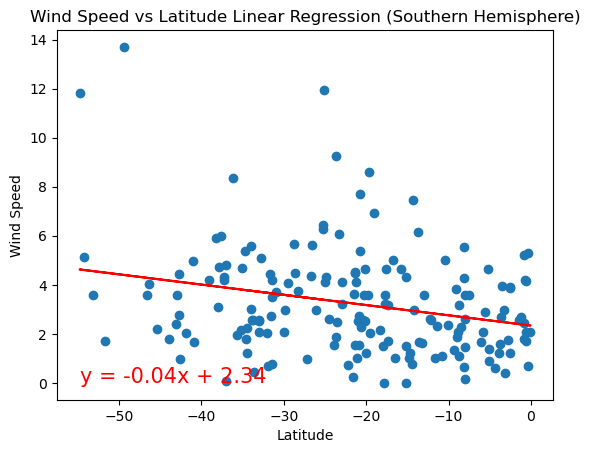

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed vs Latitude", "Latitude", "Wind Speed", "Southern")

**Discussion about the linear relationship:** There does not seem to be much correlation between the equator and the wind speed, in the Northern or Southern Hemisphere.